<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/Image_Restoration_Blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.fftpack import fftn,ifftn,fftshift,ifftshift

In [4]:
x=np.arange(-2,2,0.05)
sigma1=0.3
gauss1d_1=(1/sigma1*(np.sqrt(2*np.pi)))*np.exp(-(np.square(x/sigma1)))

sigma2=0.1
gauss1d_2=(1/(sigma2*np.sqrt(2*np.pi)))*np.exp(-(np.square(x/sigma2)))

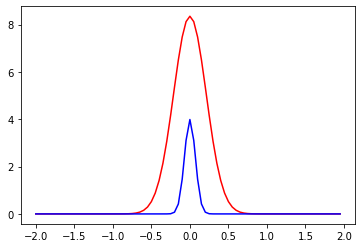

In [6]:
plt.plot(x,gauss1d_1,"r")
plt.plot(x,gauss1d_2,"b")

In [10]:
def gaussian_filter(k=5,sigma=0.1):
  arx=np.arange((-k//2)+1.0,(k//2)+1.0)
  x,y=np.meshgrid(arx,arx)
  filt=np.exp(-(0.5)*(np.square(x)+np.square(y))/np.square(sigma))
  return filt/np.sum(filt)

In [12]:
g1=gaussian_filter(k=5,sigma=0.9)
print(g1)

[[0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.01675038 0.10672687 0.19785944 0.10672687 0.01675038]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]]


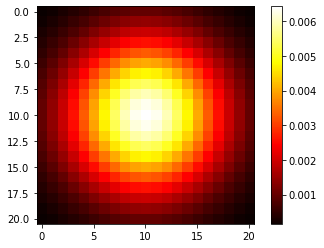

In [16]:
g2=gaussian_filter(k=21,sigma=5.2) 
plt.imshow(g2,cmap="hot",interpolation="nearest")
plt.colorbar()

In [21]:
!wget https://d29fhpw069ctt2.cloudfront.net/photo/7619/preview/895c5de8-e466-41d3-8fe7-b6f3fcdd938f_1280x1280.jpg;

--2021-09-29 06:19:20--  https://d29fhpw069ctt2.cloudfront.net/photo/7619/preview/895c5de8-e466-41d3-8fe7-b6f3fcdd938f_1280x1280.jpg
Resolving d29fhpw069ctt2.cloudfront.net (d29fhpw069ctt2.cloudfront.net)... 13.225.100.52, 13.225.100.65, 13.225.100.167, ...
Connecting to d29fhpw069ctt2.cloudfront.net (d29fhpw069ctt2.cloudfront.net)|13.225.100.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48231 (47K) [image/jpeg]
Saving to: ‘895c5de8-e466-41d3-8fe7-b6f3fcdd938f_1280x1280.jpg’

895c5de8-e466-41d3- 100%[===================>]  47.10K   112KB/s    in 0.4s    

2021-09-29 06:19:22 (112 KB/s) - ‘895c5de8-e466-41d3-8fe7-b6f3fcdd938f_1280x1280.jpg’ saved [48231/48231]



In [22]:
f=imageio.imread("895c5de8-e466-41d3-8fe7-b6f3fcdd938f_1280x1280.jpg")

In [28]:
f=f[:,:,0]

In [29]:
h=gaussian_filter(k=7,sigma=2.5)

a=int(f.shape[0]//2-h.shape[0]//2)
h_pad=np.pad(h,(a,a-1),"constant",constant_values=(0))

F=fftn(f)
H=fftn(h_pad)

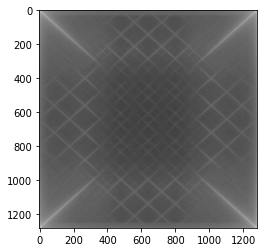

In [30]:
plt.imshow(np.log(np.abs(F)+1),cmap="gray")

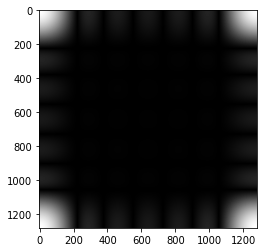

In [31]:
plt.imshow(np.log(np.abs(H)+1),cmap="gray")

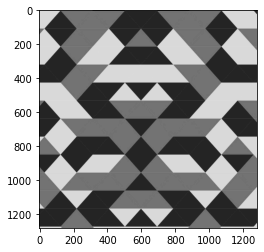

In [33]:
G=np.multiply(F,H)
g=fftshift(ifftn(G).real)

plt.imshow(f,cmap="gray")

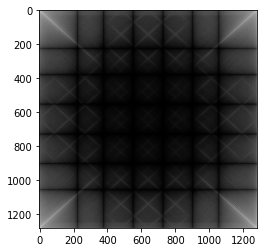

In [36]:
plt.imshow(np.log(np.abs(G)+1),cmap="gray")

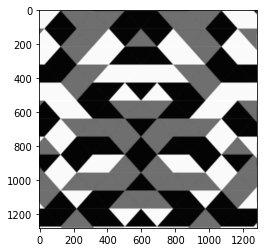

In [34]:
plt.imshow(g,cmap="gray")

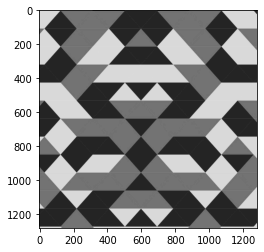

In [38]:
F_HAT=np.divide(G,H)
f_hat=ifftn(F_HAT).real

plt.imshow(f_hat,cmap="gray")

In [39]:
Hz=np.array(H,copy=True)
Hz[np.abs(H)<0.4]=0.0001
Hz[np.abs(H)<0.2]=0.0
h_z=ifftn(Hz).real[122:135,122:135]
h_z=h_z/np.sum(h_z)

In [40]:
Gz=np.multiply(F,Hz)

In [41]:
g_noise=(g.astype(np.int32)+np.random.randint(5,size=f.shape)).astype(np.uint8)

In [42]:
Gn=fftn(g_noise)

In [43]:
gz=ifftshift(ifftn(Gz).real)
gn=ifftn(Gn).real

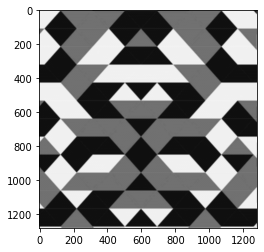

In [46]:
plt.imshow(gz,cmap="gray")

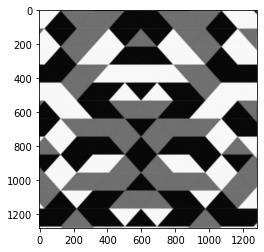

In [47]:
plt.imshow(gn,cmap="gray")

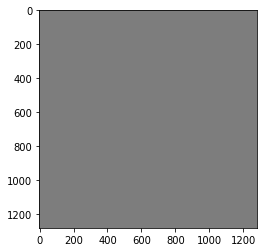

In [49]:
Gz=fftn(gz)
Gn=fftn(gn)

F_hat=np.divide(Gn,H)
fn_hat=fftshift(ifftn(F_hat).real)

plt.imshow(fn_hat,cmap="gray")

In [50]:
Fz_hat=np.divide(Gz,Hz)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


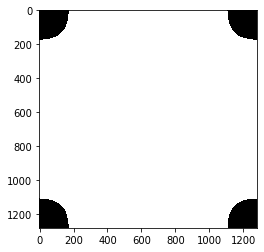

In [52]:
plt.imshow(np.abs(Fz_hat),cmap="gray")

In [53]:
Hz[np.abs(Hz)<=0.002]=0.002

In [54]:
Fz_hat=np.divide(Gz,Hz)
Fn_hat=np.divide(Gn,Hz)

In [55]:
fz_hat=fftshift(ifftn(Fz_hat)).real
fn_hat=ifftn(Fn_hat).real

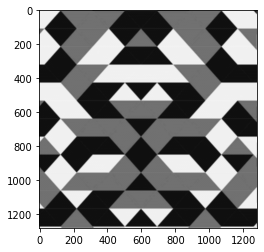

In [56]:
plt.imshow(gz,cmap="gray")

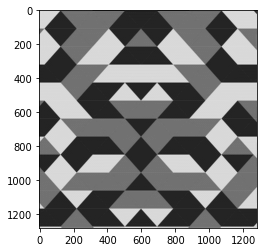

In [57]:
plt.imshow(fz_hat,cmap="gray")

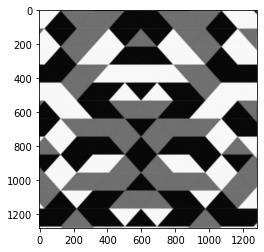

In [58]:
plt.imshow(gn,cmap="gray")

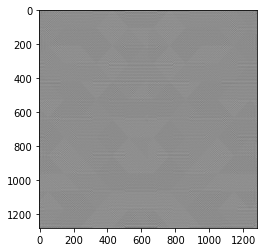

In [59]:
plt.imshow(fn_hat,cmap="gray")